In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
X_train[0].shape

(28, 28)

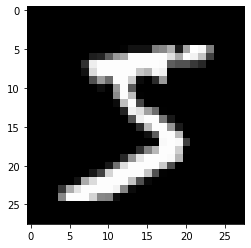

In [5]:
plt.imshow(X_train[0],cmap = 'gray')

In [6]:
y_train[0]

5

In [7]:
image_height, image_width = 28, 28

In [8]:
X_train = X_train.reshape(60000, image_height * image_width)

In [9]:
X_train.shape

(60000, 784)

In [10]:
X_test = X_test.reshape(10000, image_height * image_width)

In [11]:
X_test.shape

(10000, 784)

In [12]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
X_train /= 255.0
X_test /= 255.0

In [15]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
y_train.shape

(60000,)

In [17]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [18]:
print(y_train.shape)

(60000, 10)


In [19]:
model = Sequential()

In [20]:
model.add(Dense(512, activation = 'relu', input_shape = (784,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [21]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 798,474
Trainable params: 798,474
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1917 - accuracy: 0.9416 - val_loss: 0.1093 - val_accuracy: 0.9671
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0889 - accuracy: 0.9727 - val_loss: 0.0968 - val_accuracy: 0.9707
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0637 - accuracy: 0.9803 - val_loss: 0.1005 - val_accuracy: 0.9721
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0941 - val_accuracy: 0.9762
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.0864 - val_accuracy: 0.9781
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0799 - val_accuracy: 0.9786
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0801 - val_ac

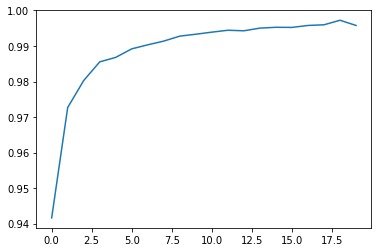

In [25]:
plt.plot(history.history['accuracy'])

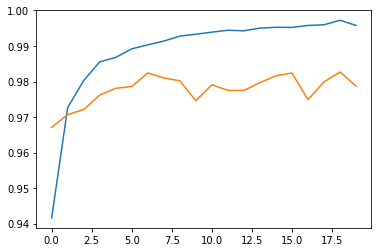

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

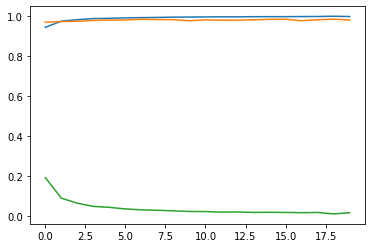

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

In [29]:
test = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1521 - accuracy: 0.9787
